In [1]:
import pylab as plt 
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
from plotting_utils import add_earth

In [6]:
def plot(df_sub, fname=None):
    plt.figure(figsize=(10, 5))
    cmap = plt.get_cmap('viridis')
    for i in range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'z{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Z (SM)')
    plt.axhline(0, color='k')
    plt.xlim(-1, 7)
    plt.ylim(-3, 3)
    add_earth()
    plt.gca().set_aspect("equal")
    if fname:
        plt.savefig(fname)
        plt.close()

In [4]:
df = pd.read_csv('out.csv')
print(len(df.index))

5000


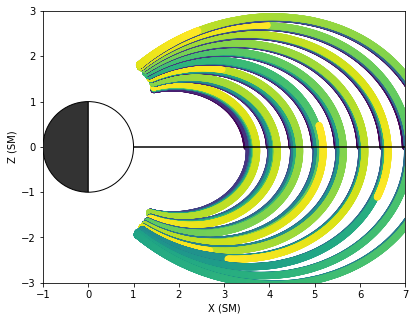

In [7]:
plot(df)

In [ ]:
import joblib
tasks = []

for i in range(len(df.index)):
    tasks.append(joblib.delayed(plot)(df.iloc[i:i+100], 'plots/%04d.png' % i))
    
print(f'Tasks: {len(tasks)}')
joblib.Parallel(n_jobs=-1, verbose=1)(tasks)

Tasks: 5000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
